
💡 Question-1:

Given preorder of a binary tree, calculate its **[depth(or height)](https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/)** [starting from depth 0]. The preorder is given as a string with two possible characters.

1. ‘l’ denotes the leaf
2. ‘n’ denotes internal node

The given tree can be seen as a full binary tree where every node has 0 or two children. The two children of a node can ‘n’ or ‘l’ or mix of both.

**Examples :**

Input  : nlnll
Output : 2
    
    

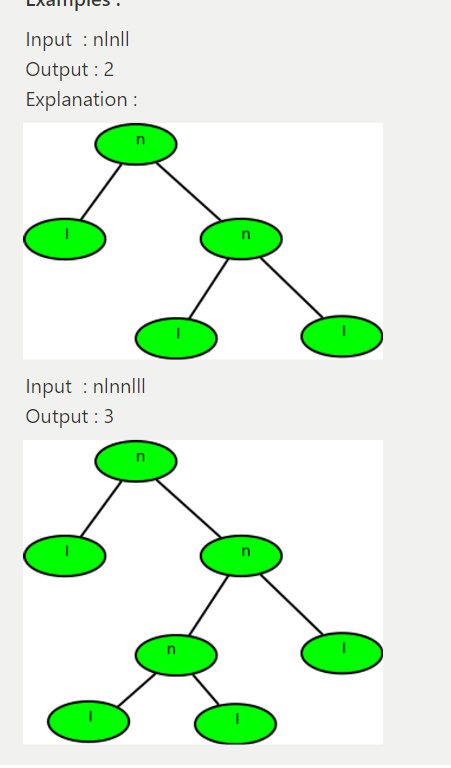

In [10]:
def findDepthRec(tree, n, index) :
 
    if (index[0] >= n or tree[index[0]] == 'l'):
        return 0
 
    # calc height of left subtree (In preorder
    # left subtree is processed before right)
    index[0] += 1
    left = findDepthRec(tree, n, index)
 
    # calc height of right subtree
    index[0] += 1
    right = findDepthRec(tree, n, index)
    return (max(left, right) + 1)
 
# Wrapper over findDepthRec()
def findDepth(tree, n) :
 
    index = [0]
    return findDepthRec(tree, n, index)
 
         
# Driver program to test above functions
if __name__ == '__main__':
    tree= "nlnlll"
    n = len(tree)
 
    print(findDepth(tree, n))
 


2



💡 Question-2:

Given a Binary tree, the task is to print the **left view** of the Binary Tree. The left view of a Binary Tree is a set of leftmost nodes for every level.

**Examples:**

***Input:***

            4

          /   \

        5     2

             /   \

            3     1

           /  \

          6    7

***Output:** 4 5 3 6*
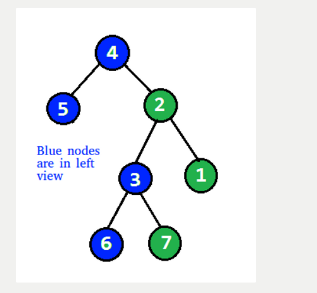



In [12]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def leftViewUtil(node, level, max_level):
    if node is None:
        return
    
    if level > max_level[0]:
        print(node.val)
        max_level[0] = level
    
    leftViewUtil(node.right, level + 1, max_level)
    leftViewUtil(node.left, level + 1, max_level)

def leftView(root):
    max_level = [0]  # Use a list to store the max level as a mutable reference
    leftViewUtil(root, 1, max_level)

# Example usage:
# Create the binary tree
root = TreeNode(4)
root.left = TreeNode(5)
root.right = TreeNode(2)
root.left.right = TreeNode(4)
root.right.left = TreeNode(3)
root.right.right = TreeNode(1)
root.right.left.left = TreeNode(6)

# Print the left view of the binary tree
leftView(root)


4
2
1
6


<aside>
💡 Question-3:

Given a Binary Tree, print the Right view of it.

The right view of a Binary Tree is a set of nodes visible when the tree is visited from the Right side.

**Examples:**

**Input:**

             1

          /     \

       2         3

    /   \       /  \

    4     5   6      7

                       \

                         8

**Output**: 

Right view of the tree is 1 3 7 8

**Input:**

             1

           /

        8

      /

    7

**Output**: 

Right view of the tree is 1 8 7

</aside>

In [14]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def rightViewUtil(node, level, max_level):
    if node is None:
        return
    
    if level > max_level[0]:
        print(node.val)
        max_level[0] = level
    
    rightViewUtil(node.left, level + 1, max_level)
    rightViewUtil(node.right, level + 1, max_level)

def rightView(root):
    max_level = [0]  # Use a list to store the max level as a mutable reference
    rightViewUtil(root, 1, max_level)

# Example usage:
# Create the binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)
root.right.right.right = TreeNode(8)

# Print the right view of the binary tree
rightView(root)


1
2
4
8



💡 Question-4:

Given a Binary Tree, The task is to print the **bottom view** from left to right. A node **x** is there in output if x is the bottommost node at its horizontal distance. The horizontal distance of the left child of a node x is equal to a horizontal distance of x minus 1, and that of a right child is the horizontal distance of x plus 1.

**Examples:**

**Input:**

             20

           /     \

        8         22

    /      \         \

   5         3        25

           /    \

         10       14

**Output:** 5, 10, 3, 14, 25.



In [16]:
from collections import deque

class Node:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None
        self.hd = 0
        self.level = 0

def bottomView(root):
    if root is None:
        return
    
    # Dictionary to store nodes based on horizontal distance
    node_map = {}
    
    # Queue for level order traversal
    queue = deque()
    queue.append(root)
    
    while queue:
        node = queue.popleft()
        
        # Update horizontal distance and level
        hd = node.hd
        level = node.level
        
        # Update the node in the map for its horizontal distance
        node_map[hd] = node.val
        
        if node.left:
            node.left.hd = hd - 1
            node.left.level = level + 1
            queue.append(node.left)
        
        if node.right:
            node.right.hd = hd + 1
            node.right.level = level + 1
            queue.append(node.right)
    
    # Print the bottom view nodes
    for hd in sorted(node_map):
        print(node_map[hd], end=' ')
    print()

# Example usage:
# Create the binary tree
root = Node(20)
root.left = Node(8)
root.right = Node(22)
root.left.left = Node(5)
root.left.right = Node(3)
root.right.right = Node(25)
root.left.right.left = Node(10)
root.left.right.right = Node(14)

# Print the bottom view of the binary tree
bottomView(root)


5 10 3 14 25 
